# Analyse

## Importation des données

In [90]:
import warnings
warnings.filterwarnings("ignore")

In [91]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
df = pd.read_csv("data.txt",sep=';')

In [92]:
df.shape

(4646774, 23)

On supprime la ligne header qui est doublée.

In [93]:
index_flag_impaye = df[df['FlagImpaye'] == 'FlagImpaye'].index
print(df.loc[index_flag_impaye])
index_flag_impaye = df[df['FlagImpaye'] == 'FlagImpaye'].index
df = df.drop(index_flag_impaye)

         ZIBZIN  IDAvisAutorisationCheque  FlagImpaye  Montant  \
1956360  ZIBZIN  IDAvisAutorisationCheque  FlagImpaye  Montant   

         DateTransaction  CodeDecision  VerifianceCPT1  VerifianceCPT2  \
1956360  DateTransaction  CodeDecision  VerifianceCPT1  VerifianceCPT2   

         VerifianceCPT3  D2CB  ScoringFP1  ScoringFP2  ScoringFP3  \
1956360  VerifianceCPT3  D2CB  ScoringFP1  ScoringFP2  ScoringFP3   

         TauxImpNb_RB  TauxImpNB_CPM  EcartNumCheq  NbrMagasin3J  DiffDateTr1  \
1956360  TauxImpNb_RB  TauxImpNB_CPM  EcartNumCheq  NbrMagasin3J  DiffDateTr1   

         DiffDateTr2  DiffDateTr3  CA3TRetMtt  CA3TR  Heure  
1956360  DiffDateTr2  DiffDateTr3  CA3TRetMtt  CA3TR  Heure  


## Valeurs manquantes

Nous n'avons pas de valeurs manquantes dans ce jeu de donées.

In [94]:
missing_values_count = df.isnull().sum()
missing_values_percentage = (missing_values_count / len(df)) * 100
print(missing_values_percentage)

ZIBZIN                      0.0
IDAvisAutorisationCheque    0.0
FlagImpaye                  0.0
Montant                     0.0
DateTransaction             0.0
CodeDecision                0.0
VerifianceCPT1              0.0
VerifianceCPT2              0.0
VerifianceCPT3              0.0
D2CB                        0.0
ScoringFP1                  0.0
ScoringFP2                  0.0
ScoringFP3                  0.0
TauxImpNb_RB                0.0
TauxImpNB_CPM               0.0
EcartNumCheq                0.0
NbrMagasin3J                0.0
DiffDateTr1                 0.0
DiffDateTr2                 0.0
DiffDateTr3                 0.0
CA3TRetMtt                  0.0
CA3TR                       0.0
Heure                       0.0
dtype: float64


## Types des variables

In [95]:
df.dtypes

ZIBZIN                      object
IDAvisAutorisationCheque    object
FlagImpaye                  object
Montant                     object
DateTransaction             object
CodeDecision                object
VerifianceCPT1              object
VerifianceCPT2              object
VerifianceCPT3              object
D2CB                        object
ScoringFP1                  object
ScoringFP2                  object
ScoringFP3                  object
TauxImpNb_RB                object
TauxImpNB_CPM               object
EcartNumCheq                object
NbrMagasin3J                object
DiffDateTr1                 object
DiffDateTr2                 object
DiffDateTr3                 object
CA3TRetMtt                  object
CA3TR                       object
Heure                       object
dtype: object

### Les nombres

In [96]:
# Liste des colonnes à convertir en numérique
numeric_cols = ['VerifianceCPT1', 'VerifianceCPT2', 'VerifianceCPT3', 'D2CB',"ScoringFP1",
                'ScoringFP2', 'ScoringFP3', 'TauxImpNb_RB', 'TauxImpNB_CPM', 'EcartNumCheq',
                'NbrMagasin3J', 'DiffDateTr1', 'DiffDateTr2', 'DiffDateTr3', 'CA3TRetMtt', 'CA3TR', 'Montant']

# Convertir les colonnes en types chaîne de caractères
df[numeric_cols] = df[numeric_cols].astype(str)

# Remplacer les virgules par des points
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.str.replace(',', '.'))

# Convertir les colonnes en types numériques
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Supprimer la ligne avec la valeur manquante
df.dropna(subset=['VerifianceCPT1'], inplace=True)

Il est plus judicieux de travailler avec des entiers au vu du dictionnaire des variables

In [97]:
# Convertir les colonnes en types entiers
df['VerifianceCPT1'] = pd.to_numeric(df['VerifianceCPT1'], errors='coerce').astype(int)
df['VerifianceCPT2'] = pd.to_numeric(df['VerifianceCPT2'], errors='coerce').astype(int)
df['VerifianceCPT3'] = pd.to_numeric(df['VerifianceCPT3'], errors='coerce').astype(int)
df['EcartNumCheq'] = pd.to_numeric(df['EcartNumCheq'], errors='coerce').astype(int)
df['NbrMagasin3J'] = pd.to_numeric(df['NbrMagasin3J'], errors='coerce').astype(int)
df['Heure'] = pd.to_numeric(df['Heure'], errors='coerce').astype(int)

On voit ici les nouveaux types

### Les dates

In [98]:
df['DateTransaction'] = pd.to_datetime(df['DateTransaction'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Créez de nouvelles colonnes pour le jour, le mois et l'année, ainsi que l'heure, la minute et la seconde
df['Jour'] = df['DateTransaction'].dt.day
df['Jour'] = df['Jour'].astype(int)
df['Mois'] = df['DateTransaction'].dt.month
df['Mois'] = df['Mois'].astype(int)

# Créez une nouvelle colonne 'Date' en combinant les composants jour, mois et année
df['Date'] = df['DateTransaction'].dt.date

# Supprimez la colonne originale 'DateTransaction' si vous ne souhaitez plus la conserver
df = df.drop(['DateTransaction'], axis=1)

### Les objets

On recode les objets en objet.

In [99]:
df['FlagImpaye'] = pd.to_numeric(df['FlagImpaye'], errors='coerce').astype(object)
df['CodeDecision'] = pd.to_numeric(df['CodeDecision'], errors='coerce').astype(object)

In [100]:
df.dtypes

ZIBZIN                       object
IDAvisAutorisationCheque     object
FlagImpaye                   object
Montant                     float64
CodeDecision                 object
VerifianceCPT1                int32
VerifianceCPT2                int32
VerifianceCPT3                int32
D2CB                          int64
ScoringFP1                  float64
ScoringFP2                  float64
ScoringFP3                  float64
TauxImpNb_RB                float64
TauxImpNB_CPM               float64
EcartNumCheq                  int32
NbrMagasin3J                  int32
DiffDateTr1                 float64
DiffDateTr2                 float64
DiffDateTr3                 float64
CA3TRetMtt                  float64
CA3TR                       float64
Heure                         int32
Jour                          int32
Mois                          int32
Date                         object
dtype: object

## Statistiques desciptives

### Flagimpaye

Sur cette étude la variables cible est FlagImpaye. On observe un fort désquilibre dans notre jeu de données. Les transactions frauduleuses représentent moins de 1% de notre dataset.

Count of Fraud Transactions: 29,995
Count of Non-fraud Transactions: 4,616,778


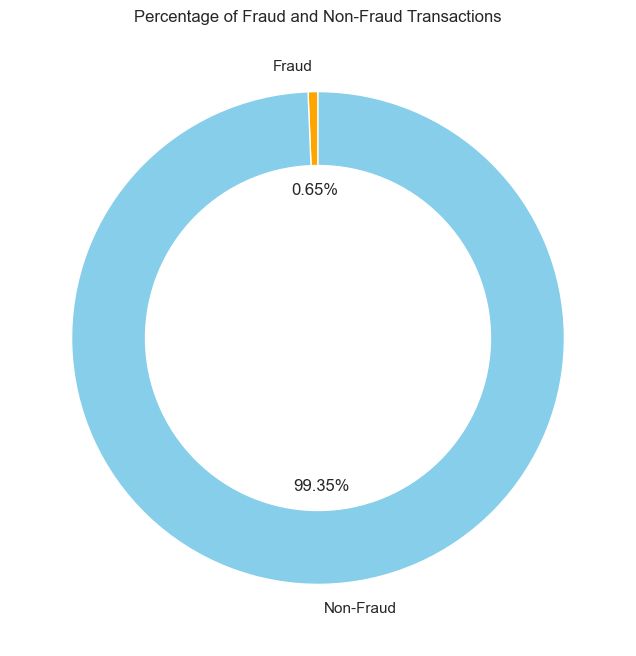

In [101]:
import matplotlib.pyplot as plt
fraud_count = df[df["FlagImpaye"] == 1].shape[0]
non_fraud_count = df[df["FlagImpaye"] == 0].shape[0]

print(f"Count of Fraud Transactions: {f'{fraud_count:,.0f}'}")
print(f"Count of Non-fraud Transactions: {f'{non_fraud_count:,.0f}'}")

total_transactions = fraud_count + non_fraud_count

fraud_percentage = (fraud_count / total_transactions) * 100
non_fraud_percentage = (non_fraud_count / total_transactions) * 100

labels = ['Fraud', 'Non-Fraud']
sizes = [fraud_percentage, non_fraud_percentage]
colors = ['orange', 'skyblue']

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Percentage of Fraud and Non-Fraud Transactions')
plt.show()

Étudions la variable FlagImpaye suivant la temporalité.

### Mois

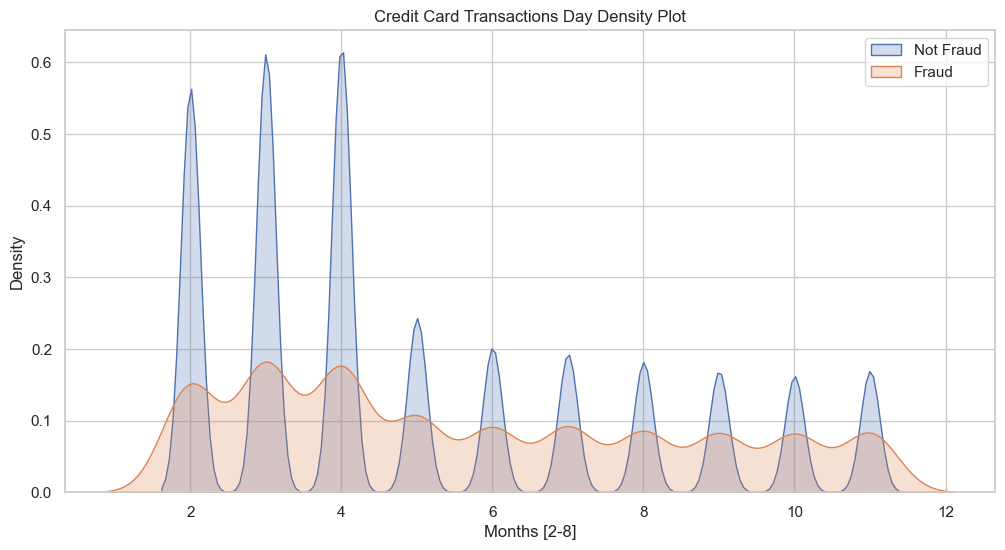

In [102]:
class_0 = df.loc[df['FlagImpaye'] == 0]["Mois"]
class_1 = df.loc[df['FlagImpaye'] == 1]["Mois"]

# Créer un tracé de densité avec Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12,6 ))

sns.kdeplot(class_0, label='Not Fraud', shade=True)
sns.kdeplot(class_1, label='Fraud', shade=True)

plt.title('Credit Card Transactions Day Density Plot')
plt.xlabel('Months [2-8]')
plt.ylabel('Density')
plt.legend()
plt.show()

### Jour

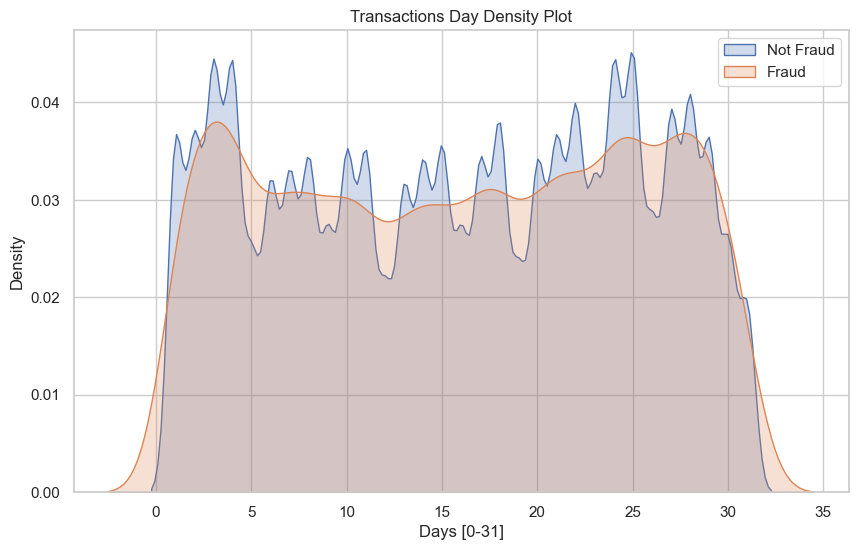

In [103]:
import seaborn as sns

class_0 = df.loc[df['FlagImpaye'] == 0]["Jour"]
class_1 = df.loc[df['FlagImpaye'] == 1]["Jour"]

# Créer un tracé de densité avec Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(class_0, label='Not Fraud', shade=True)
sns.kdeplot(class_1, label='Fraud', shade=True)
plt.title('Transactions Day Density Plot')
plt.xlabel('Days [0-31]')
plt.ylabel('Density')
plt.legend()
plt.show()

### Heure

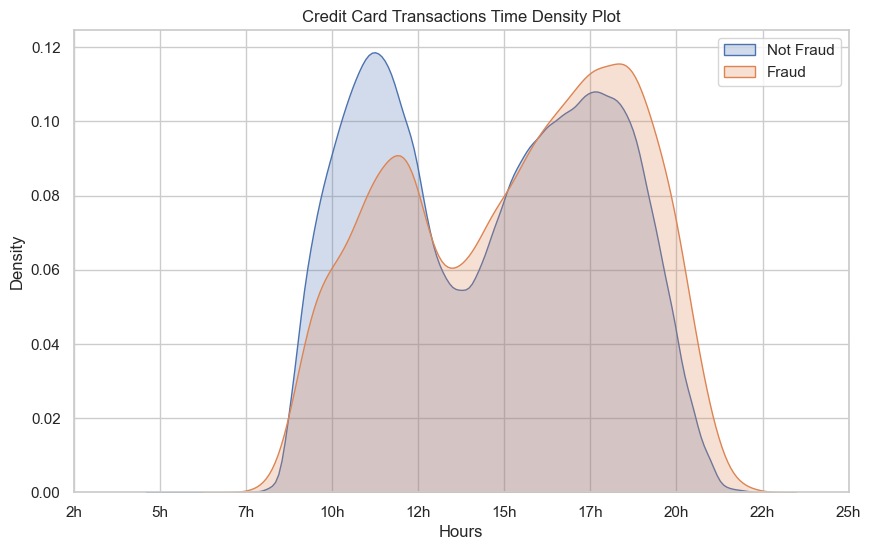

In [104]:
class_0 = df.loc[df['FlagImpaye'] == 0]["Heure"]
class_1 = df.loc[df['FlagImpaye'] == 1]["Heure"]

# Convertir les heures en minutes en divisant par 60
class_0_minutes = class_0 / 60 / 60
class_1_minutes = class_1 / 60 / 60 

# Créer un tracé de densité avec Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(class_0_minutes, label='Not Fraud', shade=True)
sns.kdeplot(class_1_minutes, label='Fraud', shade=True)
plt.title('Credit Card Transactions Time Density Plot')
plt.xlabel('Hours')
plt.ylabel('Density')
plt.legend()

# Ajuster les étiquettes de l'axe x pour afficher les heures
plt.xticks(ticks=plt.xticks()[0], labels=[f'{int(x)}h' for x in plt.xticks()[0]])
plt.show()


### Code decision

Comme indiqué dans la documentation la variables CodeDecision est une variable catégorielle qui est fortement lié avec FlagImpaye. C'est une variable qui attibué apres la transaction donc notre but serait de la prédire.

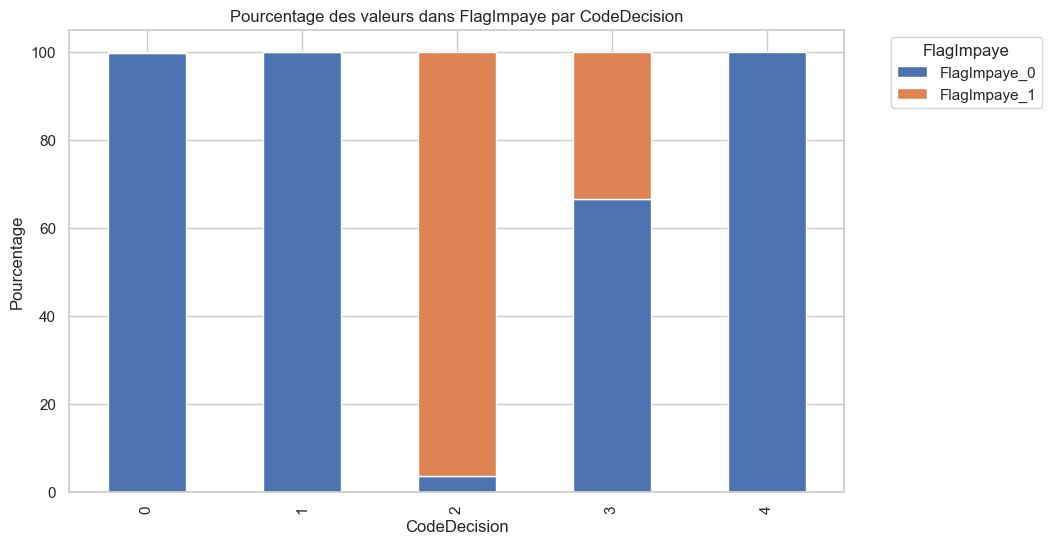

In [105]:
# Utilisez crosstab avec normalize pour obtenir le pourcentage
table_correspondance = pd.crosstab(index=df['CodeDecision'], columns=df['FlagImpaye'], normalize='index') * 100

# Renommez les colonnes pour plus de clarté
table_correspondance.columns = ['FlagImpaye_0', 'FlagImpaye_1']

# Tracez un graphique à barres empilées
table_correspondance.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Pourcentage des valeurs dans FlagImpaye par CodeDecision')
plt.xlabel('CodeDecision')
plt.ylabel('Pourcentage')
plt.legend(title='FlagImpaye', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichez le graphique
plt.show()

In [106]:
df.to_csv('data/dataframe_clean.csv', index=False)

## Exportation des données

## ACP

In [107]:
col_to_drop = ["ZIBZIN","IDAvisAutorisationCheque","Date"]
df = df.drop(columns=col_to_drop)

In [108]:
df.to_csv('data/dataframeCLEANbrut.csv', index=False)

In [109]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Séparer les caractéristiques et la variable cible
X = df.drop('FlagImpaye', axis=1)
y = df['FlagImpaye']

# Standardiser les caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'ACP
pca = PCA(n_components=2)  # Choisissez le nombre de composantes principales souhaitées
X_pca = pca.fit_transform(X_scaled)

# Créer un nouveau DataFrame avec les composantes principales
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['FlagImpaye'] = y

# Afficher le DataFrame résultant
print(df_pca.head())


        PC1       PC2 FlagImpaye
0 -1.931910 -0.214819          0
1 -3.127565  1.259877          0
2 -1.836970 -0.007472          0
3  1.009725  2.053898          0
4 -2.500208  0.627942          0
